In [1]:
%config IPCompleter.greedy=True  # Podpowiedzi składni
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random
import itertools
import math
import copy
from sortedcontainers import SortedList

# Własna funkcja zaokrąglająca
def round2(number):
    if (number - math.trunc(number) >= 0.5):
        return math.trunc(number) + 1
    else:
        return math.trunc(number)

In [2]:
# file = open('kroA200.tsp.txt')
file = open('kroB200.tsp.txt')

In [3]:
# Pomiń zbędne linie

next_line = file.readline()[0:-1]
while next_line[0] != "1":
    next_line = file.readline()[0:-1]
print(next_line)

1 3140 1401


In [4]:
# Wczytaj wszystkie punkty do tablicy

points_tab = []
while next_line!= "EOF":
    points_tab.append(next_line.split(" "))
    next_line = file.readline()[0:-1]

In [5]:
for x in range(len(points_tab)):
    for y in range(len(points_tab[0])):
        points_tab[x][y] = int(points_tab[x][y])
    points_tab[x][0] = points_tab[x][0] - 1  # zmniejsz identyfikatory punktów o 1
print(len(points_tab))
print(len(points_tab[0]))


#print(points_tab)

200
3


In [6]:
# Tablica odległości między punktami
length_tab = list(np.zeros((len(points_tab),len(points_tab)), dtype=int))
for x in range(len(length_tab)):
    for y in range(len(length_tab[0])):
        length_tab[x][y] = round2(math.sqrt((points_tab[x][1] - points_tab[y][1])**2 + (points_tab[x][2] - points_tab[y][2])**2))  # długość między punktem "x" i "y" w tablicy base_tab

        
#print(length_tab)

In [7]:
# Funkcja zwracająca długość ścieżki
def distance(path):
    dist = 0
    for x in range(len(path) - 1):
        dist+=length_tab[path[x]][path[x+1]]
    dist+=length_tab[path[len(path)-1]][path[0]]
    return dist

In [8]:
# funkcja zwracająca losową ścieżkę
def get_random_path(data_size):
    path = np.arange(data_size)
    np.random.shuffle(path)
    inside = list(path[:int(data_size/2)])
    outside = list(path[int(data_size/2):])
    return inside, outside

In [9]:
# Funkcja rysująca punkty na płaszczyźnie - zależnie od pochodzenia odpowiednio w różnych kolorach, połączone lub nie
def print_graph(path, out):
    points_inside = []
    points_outside = []

    plt.figure()
    for i in path:
        points_inside.append(copy.deepcopy(points_tab[i][1:]))
    for i in out:
        points_outside.append(copy.deepcopy(points_tab[i][1:]))

    points_inside_0 = []
    for x in points_inside:
        points_inside_0.append(copy.deepcopy(x[0]))
    points_inside_0.append(copy.deepcopy(points_inside[0][0]))
    
    points_inside_1 = []
    for x in points_inside:
        points_inside_1.append(copy.deepcopy(x[1]))
    points_inside_1.append(copy.deepcopy(points_inside[0][1]))

    points_outside_0 = []
    for x in points_outside:
        points_outside_0.append(copy.deepcopy(x[0]))
    points_outside_1 = []
    for x in points_outside:
        points_outside_1.append(copy.deepcopy(x[1]))

    plt.plot(points_inside_0,points_inside_1, '-o')
    plt.plot(points_outside_0,points_outside_1, 'o')
    plt.show()

    
#print_graph(path, out)

# BASIC ALGORITHM

In [10]:
def p_dist(a, b):  # Mocno powiązane z length_tab! Zwraca odległość między punktami
    return length_tab[a][b]

def out_of(a, size = 100):  # Funkcja zaokrąglająca zmienną do wymiaru listy
    if a == -1:
        a = size - 1
    if a == size:
        a = 0
    return a



17155


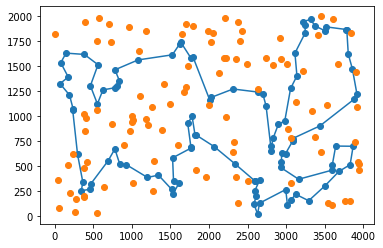

Min_path: 17155
Average_path: 171.55
Max_path: 17155

Min_time: 9.8646673
Average_time: 0.098646673
Max_time: 9.8646673


In [11]:
import time

'''
min, max i średnia długość ścieżki i czas
najlepsze rozwiązanie jako path i out
'''
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]

for omega in range(1):
    path, out = get_random_path(len(points_tab))
    path_time = time.perf_counter()

    while(True):
        best_imp1 = 0
        best_edges = []

        best_imp2 = 0
        best_vertices = []

        for x in range(len(path))[:]:  # Dla każdej krawędzi
            for y in range(len(path))[:]:  # Dla każdej innej krawędzi
                if x!=y:
                    
                    new_imp = p_dist(path[x], path[out_of(x+1)]) + p_dist(path[y], path[out_of(y+1)]) - p_dist(path[x], path[y]) - p_dist(path[out_of(x+1)], path[out_of(y+1)])
                    if new_imp > best_imp1:  # Jeśli jest to lepsze rozwiązanie, zapamiętaj je
                        best_imp1 = new_imp
                        best_edges = [x, y]

        for x in range(len(path))[:]:  # Dla każdego wierzchołka ze ścieżki
            for y in range(len(out))[:]:  # Dla każdego wierzchołka spoza ścieżki

                new_imp = p_dist(path[out_of(x-1)], path[x]) + p_dist(path[x], path[out_of(x+1)]) - p_dist(path[out_of(x-1)], out[y]) - p_dist(out[y], path[out_of(x+1)])
                if new_imp > best_imp2:  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                    best_imp2 = new_imp
                    best_vertices = [x, y]

        # Jeśli znaleziona ścieżka daje poprawę, zapisz rezultat
        if best_imp1 > 0 or best_imp2 > 0:  

            if best_imp1 >= best_imp2:
                #podmień krawędzie
                x = best_edges[0]
                y = best_edges[1]

                for z in range(int(abs(y - x)/2)):  # Zamiana krawędzi, czyli obrócenie kolejności (krawędź1; krawędź2>
                    if x < y:
                        path[x + 1 + z], path[y - z] = path[y - z], path[x + 1 + z]
                    else:
                        path[y + 1 + z], path[x - z] = path[x - z], path[y + 1 + z]
            else:
                #podmień punkty
                x = path[best_vertices[0]]
                y = out[best_vertices[1]]

                path.insert(path.index(x), y)
                path.remove(x)

                out.append(x)
                out.remove(y)
        else:
            #print("KONIEC! BRAK LEPSZEJ ŚCIEŻKI!")
            break

    print("\n")
    print(distance(path))
    print_graph(path, out)
    
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

# LIST VERSION

In [12]:
def give_next_point(path, point):  # Bierze podany punkt (nie jego indeks) i zwraca kolejny 
    return path[out_of(path.index(point) + 1)]

def give_prev_point(path, point):  # Bierze podany punkt (nie jego indeks) i zwraca poprzedni 
    return path[out_of(path.index(point) - 1)]


def cache_imp(path, cache_point, change_type):
    if change_type == "E":
        return p_dist(cache_point[2], give_next_point(path, cache_point[2])) + p_dist(cache_point[3], give_next_point(path, cache_point[3])) - p_dist(cache_point[2], cache_point[3])- p_dist(give_next_point(path, cache_point[2]), give_next_point(path, cache_point[3]))
    elif change_type == "V":
        return p_dist(give_prev_point(path, cache_point[2]), cache_point[2]) + p_dist(cache_point[2], give_next_point(path, cache_point[2])) - p_dist(give_prev_point(path, cache_point[2]), cache_point[3]) - p_dist(cache_point[3], give_next_point(path, cache_point[2]))



21654


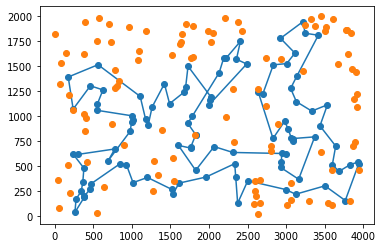

Min_path: 21654
Average_path: 216.54
Max_path: 21654

Min_time: 0.9228404999999995
Average_time: 0.009228404999999995
Max_time: 0.9228404999999995


In [13]:
# Działanie:
# Uzupełnij Sortedlist wszystkimi wynikami dla WIERZCHOŁKÓW I KRAWĘDZI (po raz pierwszy). Format: odległośc, W/K, id1, id2
# Dopóki znajdujesz w sortedList wyniki z zyskiem:
    # Weź najlepszy (ostatni) wynik z sorted list i sprawdź czy zgadza się odległość: 
        # Tak - wykonaj operację, usuń z SortedList operacje powiązane, dopisz do SortedList wszystkie operacje powiązane.
        # Nie - nie wykonuj - sprawdź prawdziwy zysk wymiany.

import time

'''
min, max i średnia długość ścieżki i czas
najlepsze rozwiązanie jako path i out
'''
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]

for omega in range(1):
    path, out = get_random_path(len(points_tab))
    path_time = time.perf_counter()
    
    cache = SortedList()  
    ids = [0, 0]
    
    # Uzupełnij Sortedlist wszystkimi wynikami dla WIERZCHOŁKÓW I KRAWĘDZI. Format: odległośc, W/K, id1, id2
    for x in range(len(path))[:]:  # Dla każdej krawędzi
        for y in range(x, len(path))[:]:  # Dla każdej innej krawędzi
            if x!=y:
                new_imp = p_dist(path[x], path[out_of(x+1)]) + p_dist(path[y], path[out_of(y+1)]) - p_dist(path[x], path[y]) - p_dist(path[out_of(x+1)], path[out_of(y+1)])
                if new_imp > 0:  # Jeśli wymiana jest opłacalna
                    cache.add([new_imp, "E", path[x], path[y]]) 

    for x in range(len(path))[:]:  # Dla każdego wierzchołka ze ścieżki
        for y in range(len(out))[:]:  # Dla każdego wierzchołka spoza ścieżki
            new_imp = p_dist(path[out_of(x-1)], path[x]) + p_dist(path[x], path[out_of(x+1)]) - p_dist(path[out_of(x-1)], out[y]) - p_dist(out[y], path[out_of(x+1)])
            if new_imp > 0:  # Jeśli wymiana jest opłacalna
                cache.add([new_imp, "V", path[x], out[y]])
    
    
    # Dopóki znajdujesz w sortedList wyniki z zyskiem > 0
    while len(cache) > 0 and cache[len(cache)-1][0] > 0:
        # Weź najlepszy (ostatni) wynik z sorted list i sprawdź, czy jest poprawny
        cache_point = copy.deepcopy(cache[len(cache)-1])
        
        
        cache_result = copy.deepcopy(cache_point[0])  # Zysk zapisany w liście
        real_result = 0  # Prawdziwy zysk / strata
        
        if cache_point[1] == "E":  # Ruch wymiany krawędzi
            if cache_point[2] not in path or cache_point[3] not in path:
                real_result = "X"  # Ruch błędny / niemożliwy do wykonania
            else:
                real_result = cache_imp(path, cache_point, "E")

        elif cache_point[1] == "V":  # Ruch wymiany wierzchołków
            if cache_point[2] in path and cache_point[3] in path or cache_point[2] not in path and cache_point[3] not in path:
                real_result = "X"  # Ruch błędny / niemożliwy do wykonania
            else:
                real_result = cache_imp(path, cache_point, "V")
            
            
        # Zapisz indeksy punktów / krawędzi do wymiany
        ids = [copy.deepcopy(cache_point[2]), copy.deepcopy(cache_point[3])]
        
        
        # Jeśli wynik się zgadza - jednocześnie sprawdza czy różny od "X"
        if cache_result == real_result:
            # Zamień krawędzie (jeśli operacja dotyczy krawędzi)
            if cache_point[1] == "E":
                
                x = path.index(cache_point[2])
                y = path.index(cache_point[3])

                for z in range(int(abs(y - x)/2)):  # Zamiana krawędzi, czyli obrócenie elementów w zbiorze (krawędź1; krawędź2>
                    if x < y:
                        path[x + 1 + z], path[y - z] = path[y - z], path[x + 1 + z]
                    else:
                        path[y + 1 + z], path[x - z] = path[x - z], path[y + 1 + z]
                        
            # Zamień punkty (jeśli operacja dotyczy punktów)     
            elif cache_point[1] == "V":
                
                x = copy.deepcopy(cache_point[2])  # path[path.index(cache_point[2])] to to samo
                y = copy.deepcopy(cache_point[3])  # out[path.index(cache_point[3])]

                path.insert(path.index(x), y)
                path.remove(x)
                out.append(x)
                out.remove(y)
                
                
        # Jeśli operacja została wdrożona lub jest błędna - usuń nieaktualne operacje z tablicy i dopisz prawidłowe
        if cache_result == real_result or real_result == "X":
            
            # Dla każdej operacji sprawdź, czy jest powiązana z zapamiętanymi indeksami
            for change in cache[:]:
                if change[2] in ids and change in cache or change[3] in ids and change in cache:
                    cache.remove(change)
                if change[0] <=0 and change in cache:
                    cache.remove(change)
                    
            # Dopisz do listy prawidłowe / aktualne operacje dotyczące zapamiętanych indeksów
            for x in range(len(path))[:]:  # Dla każdej krawędzi
                if path[x] in ids:  # Jeśli brała udział w wymianie
                    for y in range(len(path))[:]:  # Dla każdej innej krawędzi
                        if x!=y:
                            new_imp = p_dist(path[x], path[out_of(x+1)]) + p_dist(path[y], path[out_of(y+1)]) - p_dist(path[x], path[y]) - p_dist(path[out_of(x+1)], path[out_of(y+1)])
                            if new_imp > 0:  # Jeśli wymiana jest opłacalna
                                cache.add([new_imp, "E", path[x], path[y]]) 
            for x in range(len(path))[:]:  # Dla każdego wierzchołka ze ścieżki
                for y in range(len(out))[:]:  # Dla każdego wierzchołka spoza ścieżki
                    if path[x] in ids and out[y] in ids:  # Jeśli brał udział w wymianie
                        new_imp = p_dist(path[out_of(x-1)], path[x]) + p_dist(path[x], path[out_of(x+1)]) - p_dist(path[out_of(x-1)], out[y]) - p_dist(out[y], path[out_of(x+1)])
                        if new_imp > 0:  # Jeśli wymiana jest opłacalna
                            cache.add([new_imp, "V", path[x], out[y]])
            
             
        # Jeśli wynik zapamiętany w liście jest niepoprawny, lecz ruch prawidłowy
        if cache_result != real_result and real_result != "X":
            # Jeśli prawdziwy wynik jest opłacalny - zaktualizuj go
            if real_result > 0 and cache_point in cache:
                    cache.remove(cache_point)  # Konieczne dla utrzymania posortowanej listy
                    cache.add([real_result, cache_point[1], cache_point[2], cache_point[3]])
            # Jeśli prawdziwy wynik jest nieopłacalny - usuń operację z listy
            elif cache_point in cache:
                cache.remove(cache_point)
    
    
    print("\n")
    print(distance(path))
    print_graph(path, out)
    

    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

# CANDIDATES VERSION

In [14]:
# Zwraca listy kandydatów do wymiany krawędzi
def get_n_candidates(path, n):
    candidates = []
    points_and_distance = []
    
    for i in range(len(path)):
        points_and_distance = { j : length_tab[path[i]][path[j]] for j in range(0, len(path) ) }
        points_and_distance = {k: v for k, v in sorted(points_and_distance.items(), key=lambda item: item[1])[1:n+1]}  # bez pierwszego
        
        points = list(points_and_distance.keys())
        candidates.append(points)
        
    return candidates


# Zwraca listy kandydatów do wymiany wierzchołków (wymaga również out)
def get_n_candidates_out(path, out, n):
    candidates = []
    points_and_distance = []
    
    for i in range(len(path)):
        points_and_distance = { j : length_tab[path[i]][out[j]] for j in range(0, len(path) ) }
        points_and_distance = {k: v for k, v in sorted(points_and_distance.items(), key=lambda item: item[1])[0:n]}  # z pierwszym (bo to z out)
        
        points = list(points_and_distance.keys())
        candidates.append(points)
        
    return candidates




17014


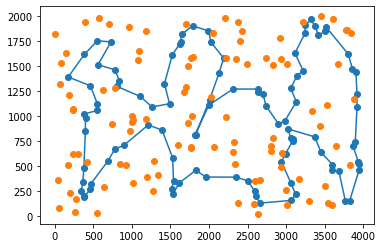

Min_path: 17014
Average_path: 170.14
Max_path: 17014

Min_time: 3.0426079999999995
Average_time: 0.030426079999999994
Max_time: 3.0426079999999995


In [15]:
import time

'''
min, max i średnia długość ścieżki i czas
najlepsze rozwiązanie jako path i out
'''
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]

for omega in range(1):
    path, out = get_random_path(len(points_tab))
    path_time = time.perf_counter()
    
    # Dopóki znajdujesz choć jedna opłacalną wymianę (w przeciwnym wypadku pętla zostanie zakończona instrukcją 'break')
    while(True):
        # Najlepsze usprawnienie wg. wymiany krawędzi
        best_imp1 = 0
        best_edges = []
        
        # Najlepsze ulepszenie wg. wymiany wierzchołków
        best_imp2 = 0
        best_vertices = []
        
        
        # Przeszukiwanie wymian krawędzi
        all_candidates = get_n_candidates(path, 5)
        for x in range(len(path))[:]:  # Dla każdej krawędzi
            current_candidates = all_candidates[x]
            
            for y in current_candidates:  # Dla każdego kandydata
                new_imp = p_dist(path[x], path[out_of(x+1)]) + p_dist(path[y], path[out_of(y+1)]) - p_dist(path[x], path[y]) - p_dist(path[out_of(x+1)], path[out_of(y+1)])
                
                if new_imp > best_imp1:  # Jeśli jest to lepsze rozwiązanie, zapisz niezbędne dane
                    best_imp1 = new_imp
                    best_edges = [x, y]
        
        
        # Przeszukiwanie wymian wierzchołków
        all_candidates = get_n_candidates_out(path, out, 5)
        for x in range(len(path))[:]:  # Dla każdego wierzchołka ze ścieżki
            current_candidates = all_candidates[x]
            
            for y in current_candidates:  # Dla każdego kandydata
                new_imp = p_dist(path[out_of(x-1)], path[x]) + p_dist(path[x], path[out_of(x+1)]) - p_dist(path[out_of(x-1)], out[y]) - p_dist(out[y], path[out_of(x+1)])

                if new_imp > best_imp2:  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                    best_imp2 = new_imp
                    best_vertices = [x, y]

        # Jeśli znaleziono zyskowne wymiana, wprowadź je
        if best_imp1 > 0 or best_imp2 > 0:  

            if best_imp1 >= best_imp2:  # Podmień krawędzie

                x = best_edges[0]
                y = best_edges[1]

                for z in range(int(abs(y - x)/2)):  # Zamiana krawędzi, czyli obrócenie elementów w zbiorze (krawędź1; krawędź2>
                    if x < y:
                        path[x + 1 + z], path[y - z] = path[y - z], path[x + 1 + z]
                    else:
                        path[y + 1 + z], path[x - z] = path[x - z], path[y + 1 + z]
                        
                        
            else:  # Podmień wierzchołki

                x = path[best_vertices[0]]
                y = out[best_vertices[1]]

                path.insert(path.index(x), y)
                path.remove(x)
                out.append(x)
                out.remove(y)
                
        else:
            #print("KONIEC! NIE ZNALEZIONO ZYSKOWNEJ WYMIANY!")
            break  # Zakończenie przeszukiwania

            
    print("\n")
    print(distance(path))
    print_graph(path, out)
    
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))